# Convolutional Neural Network

### Packages

In [2]:
# ----- Tensorflow -----
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import regularizers as reg
from keras import optimizers as opt
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

from keras.layers import Input, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, AveragePooling2D

# ----- plot -----
import matplotlib.pyplot as plt

# ----- Utility functions -----
from utils import load_data, plot_hist



c:\Users\chrse\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [3]:
data_dir = 'C:/Users/chrse/Desktop/project_aml'
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=1, batch_size=BATCH_SIZE)

### Architectures
- Consider and discuss alternative CNN model architectures

In [ ]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 15, validation_data= val)

In [29]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 30, validation_data= val)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 86, 86, 48)        17472     
                                                                 
 dropout_9 (Dropout)         (None, 86, 86, 48)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 28, 28, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                      

KeyboardInterrupt: 

In [32]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 30, validation_data= val)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 86, 86, 48)        17472     
                                                                 
 dropout_18 (Dropout)        (None, 86, 86, 48)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 28, 28, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                     

In [4]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 30, validation_data= val)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 86, 86, 48)        17472     
                                                                 
 dropout (Dropout)           (None, 86, 86, 48)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                         

In [6]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 30, validation_data= val)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 86, 86, 48)        17472     
                                                                 
 dropout_4 (Dropout)         (None, 86, 86, 48)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 48)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                       

KeyboardInterrupt: 

In [11]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 30, validation_data= val)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 86, 86, 48)        17472     
                                                                 
 dropout_20 (Dropout)        (None, 86, 86, 48)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                      

KeyboardInterrupt: 

In [21]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=128, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=reg.L2(0.006))(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_regularizer=reg.L2(0.006))(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu', kernel_regularizer=reg.L2(0.006))(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 100, validation_data= val)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_74 (Conv2D)          (None, 86, 86, 128)       46592     
                                                                 
 dropout_49 (Dropout)        (None, 86, 86, 128)       0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 28, 28, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 24, 24, 128)       409728    
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                     

KeyboardInterrupt: 

In [ ]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 30, validation_data= val)

In [ ]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 30, validation_data= val)

In [26]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=reg.L1(0.006))(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu', kernel_regularizer=reg.L1(0.006))(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu',)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 20, validation_data= val)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 86, 86, 48)        17472     
                                                                 
 dropout_2 (Dropout)         (None, 86, 86, 48)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 28, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                      

In [27]:
# ----- ResNet -----
inputs = Input(shape=(96,96,3))
x = Conv2D(filters=48, kernel_size=11, activation='relu')(inputs)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=reg.L1(0.006))(x)
x = MaxPooling2D((3, 3) )(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
#x = MaxPooling2D((3, 3), strides=(2,2) )(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#x = AveragePooling2D(pool_size=2)(x)
#x = Conv2D(filters=6, kernel_size=3, activation='relu')(x)
#x = AveragePooling2D(pool_size=2)(x)

model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.0002),
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 20, validation_data= val)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 86, 86, 48)        17472     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 24, 24, 128)       153728    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 6, 6, 192)         2213

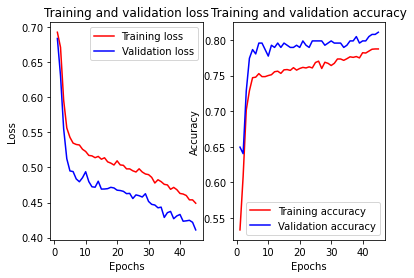

In [18]:
history_dict = history.history


# Plot 1 values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


# Plot 2 values
acc_values = history_dict['accuracy']
val_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)


# Plot 1
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'r', label='Training loss') # 'bo' is for blue dot, 'b' is for solid blue line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot 2
plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

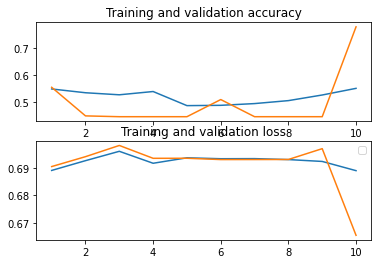

In [11]:
plot_hist(history)